# BBC News Classification Task

In this analysis, we are working with a dataset of BBC news articles, aiming to build a robust text classification model to accurately predict the category of a given news article. This involves preprocessing the raw text data, performing exploratory data analysis (EDA), extracting meaningful features, and ultimately building and evaluating machine learning models.
Overview of the Code

The provided code performs several key steps. First, it loads the training and testing datasets from CSV files. Next, it conducts exploratory data analysis (EDA) to visualize the distribution of article categories, word counts, sentiments, and word frequencies. The code then cleans the data by removing duplicates and missing values, and preprocesses the text data by converting it to lowercase, tokenizing it, removing stop words, and applying stemming. Following this, the cleaned text data is converted into numerical feature vectors using techniques like TF-IDF, GloVe, Word2Vec, and BERT embeddings. Finally, the code prepares the data for building machine learning models.
Exploratory Data Analysis (EDA) Procedures

#### Inspecting the Data

The code begins by printing the shape and a sample of the training data, along with the value counts for each category, giving an overview of the distribution of articles across different categories.

#### Visualizing Data Distributions:
Several visualizations are generated to understand the data better:

    A count plot visualizes the number of articles in each category.
    
    The average word count per category is calculated and plotted, providing insights into the length of articles in different categories.
    
    Sentiment analysis is performed to analyze and plot the sentiment polarity of articles.
    
    The distribution of article lengths is plotted.
    
    Word frequency analysis is conducted to display the top 30 most common words in the dataset.

#### Word Clouds

Word clouds are generated for each category to visualize the most frequent words, helping to understand the content focus within each category.

#### Class Frequency Plot

A plot showing the frequency of each class using a count plot helps in understanding the distribution of articles across different categories.

### Data Cleaning Procedures

The data cleaning procedures involve removing duplicate entries from the dataset and dropping any rows with missing values. Text preprocessing is performed by converting all text to lowercase, tokenizing the text into individual words, removing common stop words that do not carry significant meaning, and applying stemming to reduce words to their base or root form.

### Plan of Analysis

Based on the EDA, the plan for analysis includes continuing with the preprocessing steps to clean and normalize the text data, converting the cleaned text data into numerical feature vectors using techniques like TF-IDF, GloVe, Word2Vec, and BERT embeddings, and building various machine learning models (e.g., NMF for topic modeling, SVD for dimensionality reduction) using the extracted features. These models will be evaluated using accuracy metrics, and the best-performing models will be selected for further analysis. Hyperparameter tuning will be performed to optimize the models and improve their performance. Finally, the results will be visualized and a detailed report will be created.


### Word Embeddings

Word embeddings are a type of word representation that allows words to be represented as vectors in a continuous vector space, capturing semantic relationships between words. In this analysis, several popular word embedding methods are utilized:

TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF combines term frequency, which measures how frequently a word occurs in a document, and inverse document frequency, which measures the importance of a word by reducing the weight of words that appear frequently across all documents. This method helps highlight important words while reducing the weight of common words. For more detailed information, refer to the book "Introduction to Information Retrieval" by Manning, Raghavan, and Schütze [1], and the Scikit-learn Documentation [1].

GloVe (Global Vectors for Word Representation): GloVe trains on a global word-word co-occurrence matrix, capturing the statistical information of words across a corpus. It produces dense vector representations that capture semantic meanings and relationships between words. The original paper "GloVe: Global Vectors for Word Representation" by Pennington, Socher, and Manning (2014) provides a comprehensive explanation of this model [2]. Further details and pre-trained embeddings can be found on the Stanford GloVe Project website [2].

Word2Vec: Word2Vec uses two main models: the Skip-gram model, which predicts surrounding words given a target word, and the Continuous Bag of Words (CBOW) model, which predicts a target word based on its surrounding context words. This method learns word vectors that capture semantic and syntactic relationships. The original paper "Distributed Representations of Words and Phrases and their Compositionality" by Mikolov et al. (2013) introduces the Word2Vec model [3]. Additional resources and the official repository can be found in the Google Code Archive [3].

BERT (Bidirectional Encoder Representations from Transformers): BERT uses transformer architecture to capture context from both left and right surrounding words. It can be fine-tuned for specific tasks, making it highly versatile and effective for various NLP applications. The foundational paper "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Devlin et al. (2018) provides an in-depth explanation of this model [4]. For implementation details, refer to the Transformers Documentation by Hugging Face [4].

# References

1. Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to Information Retrieval. Cambridge University Press.
2. Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global Vectors for Word Representation. Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), 1532-1543.
3. Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. Proceedings of the 2013 Conference on Advances in Neural Information Processing Systems (NIPS), 3111-3119.
4. Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv preprint arXiv:1810.04805. Hugging Face. (n.d.). Transformers Documentation.

1) Should You Include Texts (Word Features) from the Test Dataset When Training the Unsupervised Model for Matrix Factorization?

When training an unsupervised model for matrix factorization, you should not include texts (word features) from the test dataset in the input matrix. The primary reason is that including test data in the training process would lead to data leakage, which means that information from the test set would influence the training process, resulting in an overly optimistic evaluation of the model's performance. This practice undermines the integrity of the evaluation process, as the model may not generalize well to new, unseen data in real-world applications. Instead, the model should be trained exclusively on the training data, and the test data should be used solely for evaluating the model's performance to ensure an unbiased assessment.

Train set shape: (1490, 3)
Test set shape: (735, 2)
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /home/bbehe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bbehe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bbehe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/bbehe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


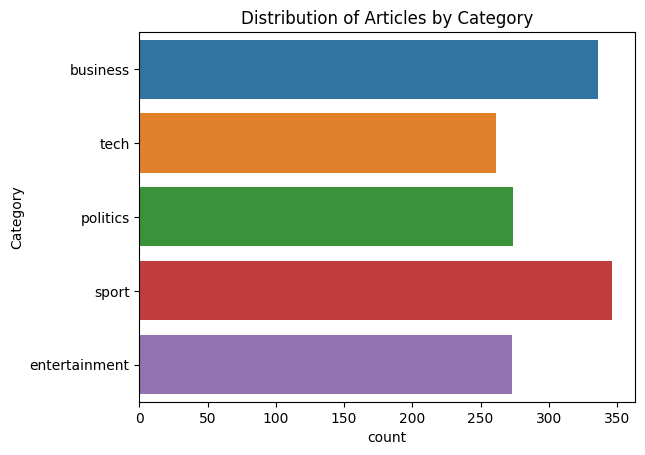

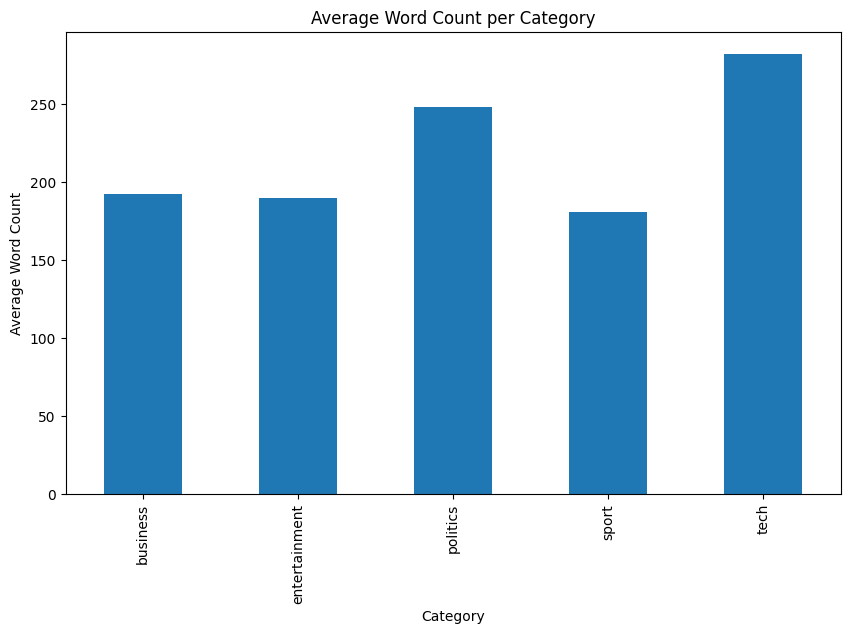

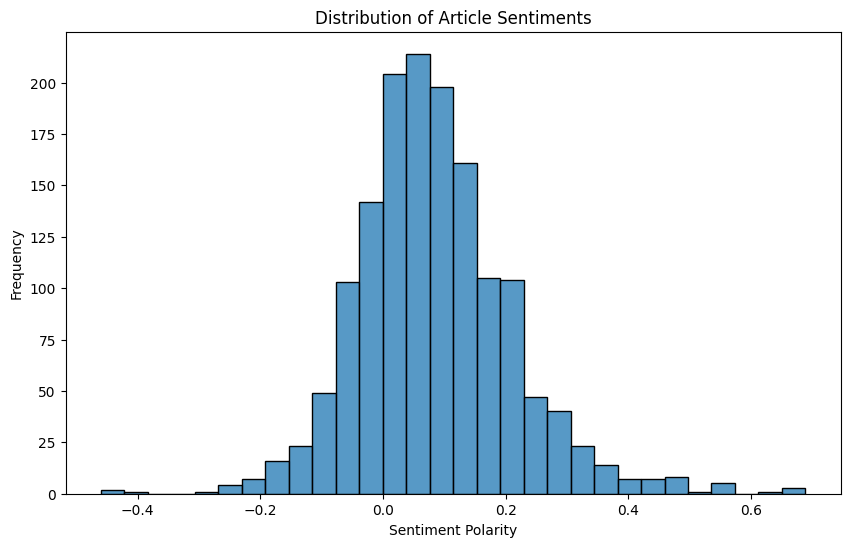

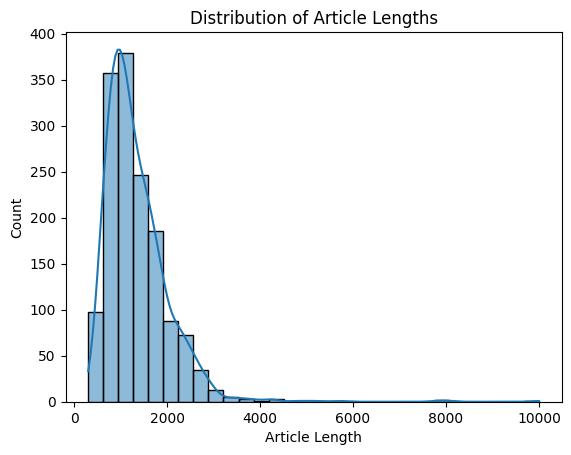

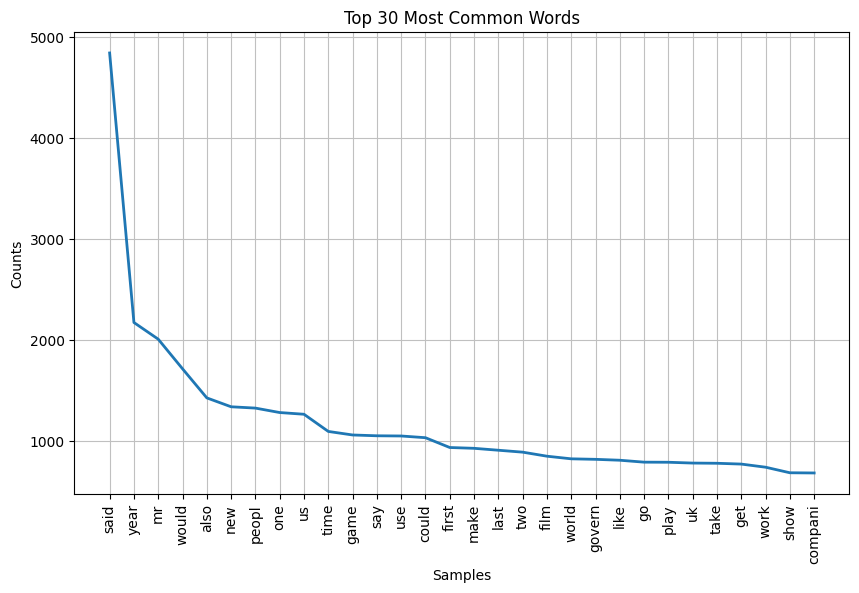

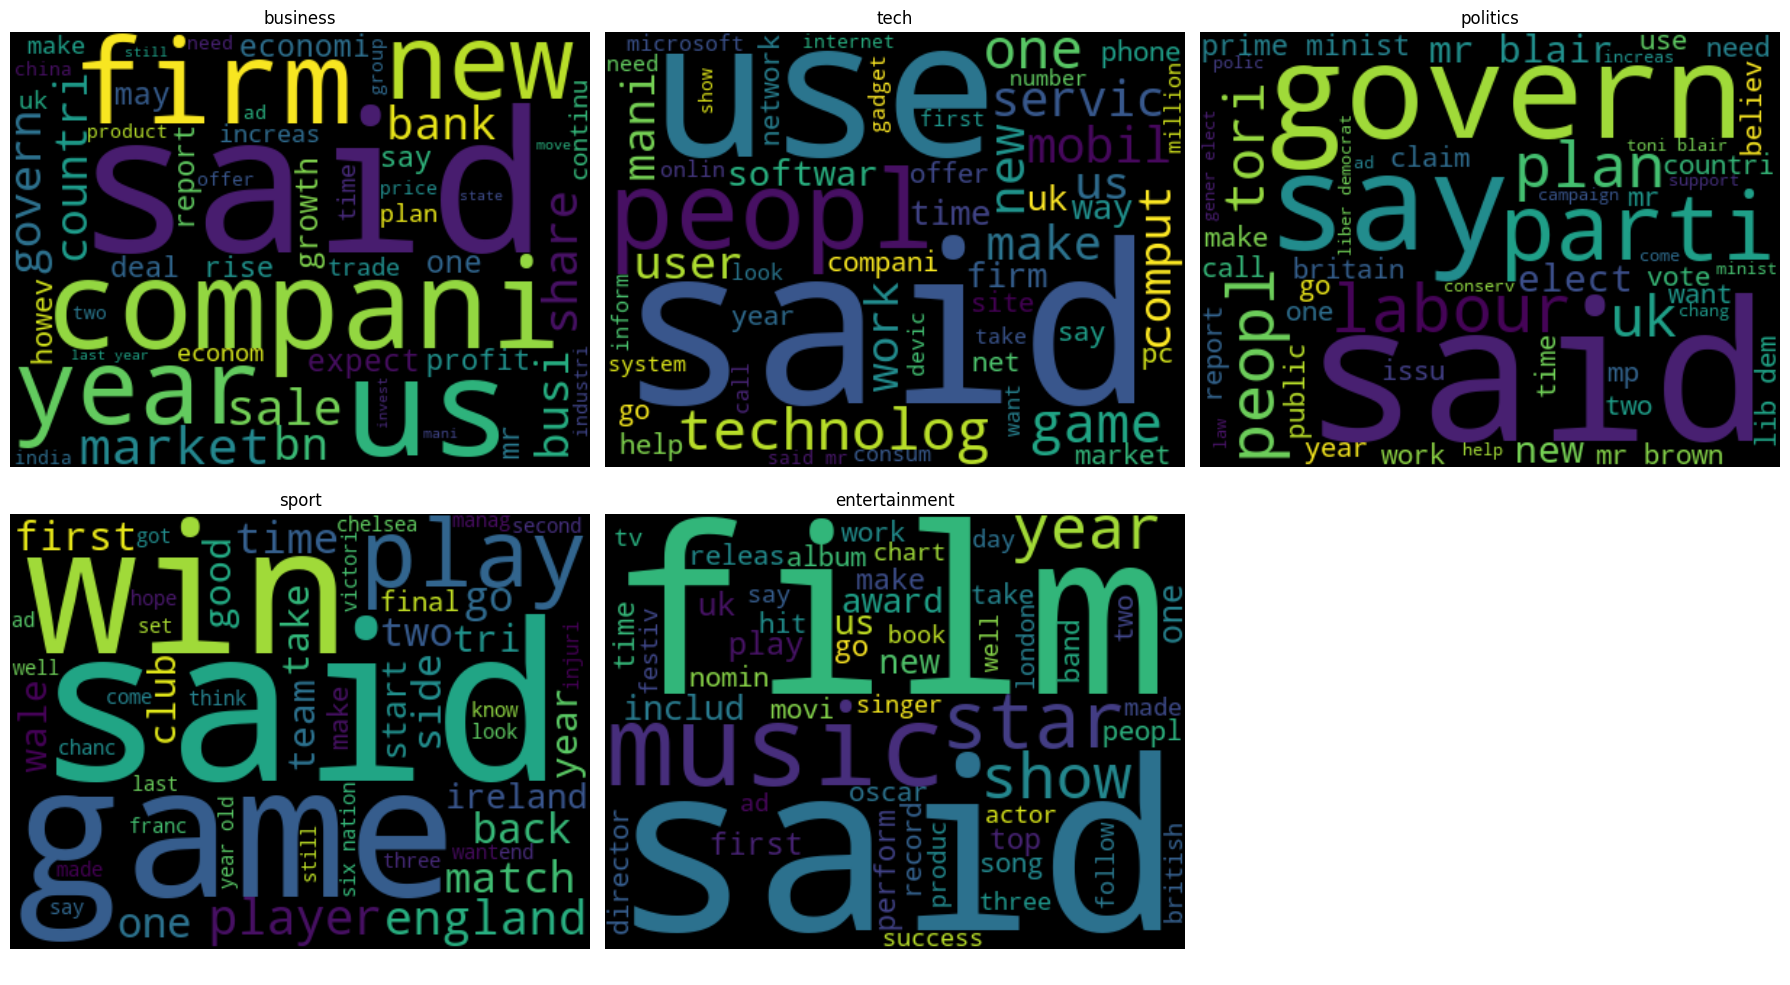

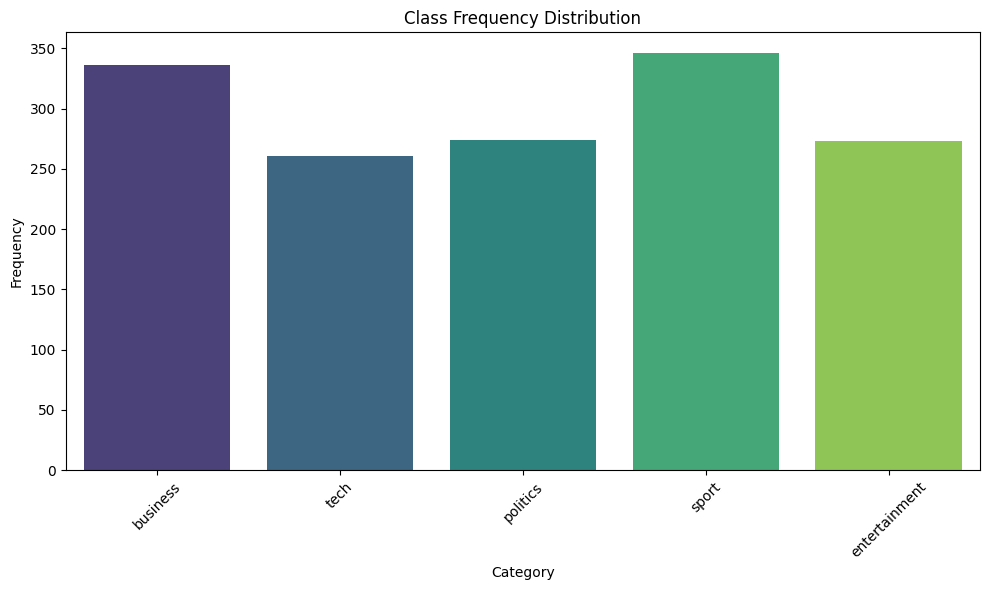

In [127]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import FreqDist, bigrams

from wordcloud import WordCloud
from textblob import TextBlob
import warnings
import gensim
from transformers import BertTokenizer, BertModel
import torch
import os
import requests
import zipfile

###NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

###Ignore warnings
warnings.filterwarnings('ignore')

###Load datasets
train_path = '/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Train.csv'
test_path = '/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

###Exploratory Data Analysis (EDA)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print(train_df.head())
print(train_df['Category'].value_counts())

###Visualize the distribution of articles across categories
sns.countplot(y='Category', data=train_df)
plt.title('Distribution of Articles by Category')
plt.show()

###Data Cleaning
train_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True)

###Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    tokens = word_tokenize(text)  
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(filtered_tokens) 

train_df['Processed_Text'] = train_df['Text'].apply(preprocess_text)
test_df['Processed_Text'] = test_df['Text'].apply(preprocess_text)

###Additional EDA
###Average word count per category
train_df['Word Count'] = train_df['Processed_Text'].apply(lambda x: len(x.split()))
average_word_count = train_df.groupby('Category')['Word Count'].mean()

plt.figure(figsize=(10, 6))
average_word_count.plot(kind='bar')
plt.title('Average Word Count per Category')
plt.ylabel('Average Word Count')
plt.show()

###Sentiment analysis
train_df['Sentiment'] = train_df['Processed_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Sentiment'], bins=30, kde=False)
plt.title('Distribution of Article Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

###Distribution of Article Lengths
train_df['Article Length'] = train_df['Processed_Text'].apply(len)
sns.histplot(train_df['Article Length'], bins=30, kde=True)
plt.title('Distribution of Article Lengths')
plt.show()

###Word Frequency Analysis
all_words = [word for tokens in train_df['Processed_Text'].apply(lambda x: x.split()) for word in tokens]
word_freq = FreqDist(all_words)

plt.figure(figsize=(10, 6))
word_freq.plot(30, title='Top 30 Most Common Words')

###Word Clouds by Category
categories = train_df['Category'].unique()
num_rows = (len(categories) + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 10))  
axes = axes.flatten()

for i, category in enumerate(categories):
    subset = train_df[train_df['Category'] == category]
    text = ' '.join(subset['Processed_Text'].tolist())
    wordcloud = WordCloud(width=400, height=300, max_words=50).generate(text)
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

###Plotting the class frequency using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=train_df, palette='viridis')
plt.title('Class Frequency Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()

###Show the plot
plt.show()

The below code demonstrates the preprocessing of text data using the spaCy library. Initially, the en_core_web_sm model from spaCy is loaded, which provides functionalities for natural language processing tasks such as tokenization, lemmatization, and part-of-speech tagging. A custom preprocessing function, custom_preprocessing, is defined to process the text data. This function converts the input text to lowercase and utilizes the spaCy model to parse the text. It then filters out stop words, punctuation, and digits, and performs lemmatization on the remaining tokens. The lemmatized tokens are joined back into a single string.

Next, the training dataset is cleaned by removing duplicate entries based on the 'Text' column, resulting in the cleaned_train_data DataFrame. The custom_preprocessing function is applied to the 'Text' column of the cleaned training dataset, producing a list of processed training texts stored in processed_training_text. Similarly, the testing dataset undergoes the same preprocessing steps, and the processed testing texts are stored in processed_testing_text. This preprocessing ensures that the text data is standardized and simplified, which is crucial for subsequent analysis and modeling steps.

In [128]:
###Load Spacy model
nlp_model = spacy.load("en_core_web_sm")

def custom_preprocessing(text):
    doc = nlp_model(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_digit]
    return ' '.join(tokens)

###Remove duplicate entries
cleaned_train_data = train_df.drop_duplicates(subset=['Text'])

###Process the training dataset
processed_training_text = [custom_preprocessing(doc) for doc in cleaned_train_data['Text']]

###Process the testing dataset
processed_testing_text = [custom_preprocessing(doc) for doc in test_df['Text']]

The below code performs several essential steps for text preprocessing and feature extraction setting the stage for subsequent machine learning tasks.

First, the training labels are extracted from the cleaned training dataset and stored in the processed_training_labels list. To ensure consistency, an assertion checks that the lengths of processed_training_text and processed_training_labels match.

TF-IDF Vectorizer

The TF-IDF vectorizer transforms the processed text data into numerical feature vectors. By setting max_df to 0.95 and min_df to 2, the vectorizer filters out very common and very rare words. The fit_transform method is applied to the processed training text to create the tfidf_matrix, while the transform method generates the tfidf_test_matrix for the test data.

Word2Vec Embeddings

Next, the code trains a Word2Vec model using the processed training text. The Word2Vec model from the gensim library creates word embeddings with a vector size of 100, a context window of 5, and a minimum word count of 2. The resulting embeddings are averaged to form document-level embeddings for both training (word2vec_embeddings_train) and testing (word2vec_embeddings_test) datasets.

GloVe Embeddings

The code also incorporates GloVe embeddings. If the GloVe files are not already downloaded and extracted, the code downloads and extracts them from the Stanford NLP website. The GloVe embeddings are then loaded into a dictionary (glove_embeddings_index). A helper function, get_glove_embeddings, computes the average GloVe embedding for each document, resulting in glove_embeddings_train and glove_embeddings_test.

BERT Embeddings

Finally, the code generates BERT embeddings using the transformers library by Hugging Face. The BertTokenizer and BertModel are loaded to process the text data. The get_bert_embeddings function tokenizes the input text, feeds it into the BERT model, and computes the mean of the output embeddings. The resulting embeddings are stored in bert_embeddings_train for the training data and bert_embeddings_test for the test data.



In [129]:
processed_training_labels = cleaned_train_data['Category'].tolist()
###Ensure lengths are consistent
assert len(processed_training_text) == len(processed_training_labels), "Mismatch in processed training text and labels length"

###TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(max_df=.95, min_df=2, stop_words=stopwords.words('english'))
tfidf_matrix = tfidf_vect.fit_transform(processed_training_text)
tfidf_test_matrix = tfidf_vect.transform(processed_testing_text)

###Word2Vec Embeddings
word2vec_model = gensim.models.Word2Vec(sentences=[text.split() for text in processed_training_text], vector_size=100, window=5, min_count=2, workers=4)
word2vec_embeddings_train = np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for text in processed_training_text])
word2vec_embeddings_test = np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for text in processed_testing_text])

###Download and extract GloVe embeddings
glove_zip_path = 'glove.6B.zip'
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_dir = 'glove.6B'

if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)

if not os.path.exists(glove_dir):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)

glove_embeddings_index = {}
glove_path = os.path.join(glove_dir, 'glove.6B.100d.txt')

with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings_index[word] = vector

def get_glove_embeddings(text):
    return np.mean([glove_embeddings_index[word] for word in text.split() if word in glove_embeddings_index] or [np.zeros(100)], axis=0)

glove_embeddings_train = np.array([get_glove_embeddings(text) for text in processed_training_text])
glove_embeddings_test = np.array([get_glove_embeddings(text) for text in processed_testing_text])

###BERT Embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

bert_embeddings_train = np.array([get_bert_embeddings(text) for text in processed_training_text])
bert_embeddings_test = np.array([get_bert_embeddings(text) for text in processed_testing_text])

The below code performs an extensive hyperparameter search to identify the best model configurations for topic classification using both Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization (NMF). It begins by initializing a dictionary embeddings that stores various types of word embeddings for the training and testing datasets, including TF-IDF, Word2Vec, GloVe, and BERT embeddings. The code then defines hyperparameter search spaces for both NMF and SVD models. For NMF, the hyperparameters include the number of components, initialization methods, beta divergence loss functions, maximum iterations, regularization parameters, and L1 regularization ratios. For SVD, the hyperparameters only include the number of components.

A dictionary topics_map is created to map numeric categories to their corresponding topic names such as sport, politics, business, entertainment, and tech. The code then performs an iterative search over the combinations of embeddings and hyperparameters, training both SVD and NMF models. During this process, it calculates the accuracy of each model on the training data and saves the top 100 configurations based on training accuracy.

For SVD models, the code iterates over each embedding type (excluding TF-IDF, which is used exclusively for NMF) and various values for the number of components. It trains an SVD model, transforms the training data, makes predictions, calculates accuracy, and generates predictions for the test data. The results, including model type, embedding type, hyperparameters, and accuracy, are stored.

For NMF models, the code iterates over all combinations of NMF hyperparameters using the TF-IDF embeddings. It trains an NMF model, transforms the TF-IDF training data, makes predictions, calculates accuracy, and generates predictions for the test data. These results are also stored.

Finally, the results are compiled into a DataFrame, sorted by training accuracy, and the top 100 configurations are saved to a CSV file. Predictions for the test data based on the top configurations are saved to separate CSV files. 

In [130]:
###Embeddings Combinations
embeddings = {
    'tfidf': (tfidf_matrix, tfidf_test_matrix),
    'word2vec': (word2vec_embeddings_train, word2vec_embeddings_test),
    'glove': (glove_embeddings_train, glove_embeddings_test),
    'bert': (bert_embeddings_train, bert_embeddings_test)
}

###NMF Hyperparameters
nmf_params = {
    'n_components': [5, 10, 15],
    'init': ['nndsvda', 'random', 'nndsvd', 'nndsvdar'],
    'beta_loss': ['frobenius', 'kullback-leibler', 'itakura-saito'],
    'max_iter': [200, 300],
    'alpha_W': [0.00005, 0.0001, 0.001, 0.01],
    'alpha_H': [0.00005, 0.0001, 0.001, 0.01],
    'l1_ratio': [0, 0.5, 1]
}

###SVD Hyperparameters
svd_params = {
    'n_components': [5, 10, 15]
}

###Map topics to numeric categories
topics_map = {0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}

###Perform iterative search
results = []
total_combinations = (len(embeddings) * len(svd_params['n_components']) +
                      len(nmf_params['n_components']) * len(nmf_params['init']) * len(nmf_params['beta_loss']) *
                      len(nmf_params['max_iter']) * len(nmf_params['alpha_W']) * len(nmf_params['alpha_H']) *
                      len(nmf_params['l1_ratio']))
current_combination = 0

###SVD Models
for embedding_name, (train_matrix, test_matrix) in embeddings.items():
    if embedding_name == 'tfidf':  
        continue
    for n_components in svd_params['n_components']:
        current_combination += 1
        print(f'Processing combination {current_combination}/{total_combinations}: embedding={embedding_name}, n_components={n_components}')

        try:
            ###SVD Model
            svd_model = TruncatedSVD(n_components=n_components, random_state=42)
            svd_model.fit(train_matrix)

            topic_dist_train = svd_model.transform(train_matrix)
            train_predictions = topic_dist_train.argmax(axis=1)
            predicted_labels = [topics_map[pred] if pred in topics_map else "unknown" for pred in train_predictions]

            ###Ensure lengths are consistent before calculating accuracy
            if len(predicted_labels) != len(processed_training_labels):
                print(f"Skipping combination {current_combination} due to inconsistent lengths")
                continue

            ###Calculate accuracy for the training dataset
            training_accuracy = round(accuracy_score(processed_training_labels, predicted_labels), 4)

            ###Transform the test data using the same SVD model
            topic_dist_test = svd_model.transform(test_matrix)
            test_predictions = topic_dist_test.argmax(axis=1)
            predicted_test_labels = [topics_map[pred] if pred in topics_map else "unknown" for pred in test_predictions]

            ###Save results
            result = {
                'model': 'SVD',
                'embedding': embedding_name,
                'n_components': n_components,
                'training_accuracy': training_accuracy,
                'predicted_test_labels': predicted_test_labels
            }
            results.append(result)

        except ValueError as e:
            print(f"Error for combination {current_combination}: {e}")
            continue

###NMF Models for TF-IDF
for n_components in nmf_params['n_components']:
    for init in nmf_params['init']:
        for beta_loss in nmf_params['beta_loss']:
            for max_iter in nmf_params['max_iter']:
                for alpha_W in nmf_params['alpha_W']:
                    for alpha_H in nmf_params['alpha_H']:
                        for l1_ratio in nmf_params['l1_ratio']:
                            current_combination += 1
                            print(f'Processing combination {current_combination}/{total_combinations}: n_components={n_components}, init={init}, beta_loss={beta_loss}, max_iter={max_iter}, alpha_W={alpha_W}, alpha_H={alpha_H}, l1_ratio={l1_ratio}')

                            try:
                                ###NMF Model
                                nmf_model = NMF(
                                    n_components=n_components,
                                    random_state=42,
                                    init=init,
                                    beta_loss=beta_loss,
                                    max_iter=max_iter,
                                    alpha_W=alpha_W,
                                    alpha_H=alpha_H,
                                    l1_ratio=l1_ratio
                                ).fit(tfidf_matrix)

                                topic_dist_train = nmf_model.transform(tfidf_matrix)
                                train_predictions = topic_dist_train.argmax(axis=1)
                                predicted_labels = [topics_map[pred] if pred in topics_map else "unknown" for pred in train_predictions]

                                ###Ensure lengths are consistent before calculating accuracy
                                if len(predicted_labels) != len(processed_training_labels):
                                    print(f"Skipping combination {current_combination} due to inconsistent lengths")
                                    continue

                                ###Calculate accuracy for the training dataset
                                training_accuracy = round(accuracy_score(processed_training_labels, predicted_labels), 4)

                                ###Transform the test data using the same NMF model
                                topic_dist_test = nmf_model.transform(tfidf_test_matrix)
                                test_predictions = topic_dist_test.argmax(axis=1)
                                predicted_test_labels = [topics_map[pred] if pred in topics_map else "unknown" for pred in test_predictions]

                                ###Save results
                                result = {
                                    'model': 'NMF',
                                    'embedding': 'tfidf',
                                    'n_components': n_components,
                                    'init': init,
                                    'beta_loss': beta_loss,
                                    'max_iter': max_iter,
                                    'alpha_W': alpha_W,
                                    'alpha_H': alpha_H,
                                    'l1_ratio': l1_ratio,
                                    'training_accuracy': training_accuracy,
                                    'predicted_test_labels': predicted_test_labels
                                }
                                results.append(result)

                            except ValueError as e:
                                print(f"Error for combination {current_combination}: {e}")
                                continue

###Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='training_accuracy', ascending=False).head(100)

for i, row in results_df.iterrows():
    output_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': row['predicted_test_labels']})
    output_csv_path = f'/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_{row["model"]}_{row["embedding"]}_{row["n_components"]}.csv'
    output_df.to_csv(output_csv_path, index=False)
    print(f'Predicted Labels for Test Data have been written to {output_csv_path}')

###Save the top 10 results to a CSV file
results_csv_path = '/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Top_10_NMF_SVD_Results.csv'
results_df.to_csv(results_csv_path, index=False)

#print(f'Top 10 Results have been written to {results_csv_path}')

Processing combination 1/3468: embedding=word2vec, n_components=5
Processing combination 2/3468: embedding=word2vec, n_components=10
Processing combination 3/3468: embedding=word2vec, n_components=15
Processing combination 4/3468: embedding=glove, n_components=5
Processing combination 5/3468: embedding=glove, n_components=10
Processing combination 6/3468: embedding=glove, n_components=15
Processing combination 7/3468: embedding=bert, n_components=5
Processing combination 8/3468: embedding=bert, n_components=10
Processing combination 9/3468: embedding=bert, n_components=15
Processing combination 10/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0
Processing combination 11/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 12/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Proce

Processing combination 58/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0
Processing combination 59/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 60/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 61/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 62/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 63/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 64/3468: n_components=5, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 65/3

Processing combination 301/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 302/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Error for combination 302: Array passed to NMF (input H) is full of zeros.
Processing combination 303/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 304/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 305/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 305: Array passed to NMF (input H) is full of zeros.
Processing combination 306/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Processing comb

Processing combination 352/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 353/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 353: Array passed to NMF (input H) is full of zeros.
Processing combination 354/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Processing combination 355/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 356/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error for combination 356: Array passed to NMF (input H) is full of zeros.
Processing combination 357/3468: n_components=5, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=1
Processing combinatio

Processing combination 588/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 589/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 590/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 591/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 592/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 593/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 593: Array passed to NMF (input H) is full of zeros.
Processing combination 594/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_ite

Processing combination 640/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 641/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 641: Array passed to NMF (input H) is full of zeros.
Processing combination 642/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Error for combination 642: Array passed to NMF (input H) is full of zeros.
Processing combination 643/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 644/3468: n_components=5, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error for combination 644: Array passed to NMF (input H) is full of zeros.
Processing combination 645/3468: n_components=5, init=nndsvd, beta_loss=frobenius, 

Processing combination 876/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 877/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 878/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 879/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 880/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 881/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 881: Array passed to NMF (input H) is full of zeros.
Processing combination 882/3468: n_components=5, init=nndsvdar, beta_loss=frob

Processing combination 927/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 928/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 929/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 929: Array passed to NMF (input H) is full of zeros.
Processing combination 930/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Error for combination 930: Array passed to NMF (input H) is full of zeros.
Processing combination 931/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 932/3468: n_components=5, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error f

Processing combination 1163/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 1164/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 1165/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 1166/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 1167/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1168/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 1169/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Erro

Processing combination 1214/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 1215/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1216/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 1217/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 1217: Array passed to NMF (input H) is full of zeros.
Processing combination 1218/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Error for combination 1218: Array passed to NMF (input H) is full of zeros.
Processing combination 1219/3468: n_components=10, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio

Processing combination 1451/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Error for combination 1451: Array passed to NMF (input H) is full of zeros.
Processing combination 1452/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 1453/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 1454/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Error for combination 1454: Array passed to NMF (input H) is full of zeros.
Processing combination 1455/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1456/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
P

Processing combination 1501/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 1502/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Error for combination 1502: Array passed to NMF (input H) is full of zeros.
Processing combination 1503/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1504/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 1505/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 1505: Array passed to NMF (input H) is full of zeros.
Processing combination 1506/3468: n_components=10, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
P

Processing combination 1739/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 1740/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 1741/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 1742/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 1743/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1744/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 1745/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for c

Processing combination 1790/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 1791/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 1792/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 1793/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 1793: Array passed to NMF (input H) is full of zeros.
Processing combination 1794/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Error for combination 1794: Array passed to NMF (input H) is full of zeros.
Processing combination 1795/3468: n_components=10, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Pro

Processing combination 2027/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 2028/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 2029/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2030/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 2031/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2032/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2033/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0

Processing combination 2077/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2078/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 2079/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2080/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2081/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 2081: Array passed to NMF (input H) is full of zeros.
Processing combination 2082/3468: n_components=10, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Error for combination 2082: Array passed to NMF (input H) is full

Processing combination 2315/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 2316/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 2317/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2318/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 2319/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2320/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2321/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Erro

Processing combination 2367/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2368/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2369/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 2369: Array passed to NMF (input H) is full of zeros.
Processing combination 2370/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Processing combination 2371/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 2372/3468: n_components=15, init=nndsvda, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error for combination 2372: Array passed to NMF (input H) is full of zeros.

Processing combination 2603/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Error for combination 2603: Array passed to NMF (input H) is full of zeros.
Processing combination 2604/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 2605/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2606/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Error for combination 2606: Array passed to NMF (input H) is full of zeros.
Processing combination 2607/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2608/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
P

Processing combination 2653/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2654/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Error for combination 2654: Array passed to NMF (input H) is full of zeros.
Processing combination 2655/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2656/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2657/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 2657: Array passed to NMF (input H) is full of zeros.
Processing combination 2658/3468: n_components=15, init=random, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
P

Processing combination 2891/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 2892/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 2893/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 2894/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 2895/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2896/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2897/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for c

Processing combination 2943/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 2944/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 2945/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 2945: Array passed to NMF (input H) is full of zeros.
Processing combination 2946/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Processing combination 2947/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 2948/3468: n_components=15, init=nndsvd, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error for combination 2948: Array passed to NMF (input H) is full of zeros.
Proce

Processing combination 3179/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=0.5
Processing combination 3180/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=5e-05, l1_ratio=1
Processing combination 3181/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0
Processing combination 3182/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=0.5
Processing combination 3183/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 3184/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 3185/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=200, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0

Processing combination 3231/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.0001, l1_ratio=1
Processing combination 3232/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0
Processing combination 3233/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=0.5
Error for combination 3233: Array passed to NMF (input H) is full of zeros.
Processing combination 3234/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.001, l1_ratio=1
Processing combination 3235/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0
Processing combination 3236/3468: n_components=15, init=nndsvdar, beta_loss=frobenius, max_iter=300, alpha_W=5e-05, alpha_H=0.01, l1_ratio=0.5
Error for combination 3236: Array passed to NMF (input H) is full of 

The tables below summarize the results of extensive hyperparameter searches conducted using both Non-Negative Matrix Factorization (NMF) and Singular Value Decomposition (SVD) models on various word embeddings. The aim was to identify the best model configurations for topic classification of news articles based on training accuracy.

In this case, the training accuracy for all SVD model configurations is consistently 0.2375, indicating a relatively lower performance compared to the NMF model on TF-IDF embeddings which achieved higher accuracies around 0.9083 on the training set.

| model | embedding | n_components | training_accuracy | init    | beta_loss  | max_iter | alpha_W | alpha_H | l1_ratio |
|-------|-----------|--------------|-------------------|---------|------------|----------|---------|---------|----------|
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 300      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 200      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 200      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 300      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 300      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 300      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 200      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 200      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 300      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 300      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 300      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 300      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 200      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 200      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 200      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 200      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 200      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 200      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 300      | 0.001   | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 300      | 0.001   | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvdar| frobenius  | 300      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 200      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvd  | frobenius  | 300      | 0.00005 | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9083            | nndsvda | frobenius  | 200      | 0.0001  | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 200      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 200      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 300      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 300      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 200      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 200      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 300      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 300      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 200      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 200      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 300      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 300      | 0.00005 | 0.0001  | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 200      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 200      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 200      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 300      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 200      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 300      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvdar| frobenius  | 300      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 300      | 0.00005 | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 300      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 200      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvda | frobenius  | 200      | 0.0001  | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.9076            | nndsvd  | frobenius  | 300      | 0.0001  | 0.001   | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvd  | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvd  | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvdar| frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvdar| frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvda | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.9069            | nndsvda | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 5            | 0.7757            | nndsvd  | frobenius  | 200      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 5            | 0.7757            | nndsvdar| frobenius  | 300      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 5            | 0.7757            | nndsvd  | frobenius  | 300      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 5            | 0.7757            | nndsvda | frobenius  | 200      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 5            | 0.7757            | nndsvda | frobenius  | 300      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 5            | 0.7757            | nndsvdar| frobenius  | 200      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 15           | 0.7632            | nndsvd  | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7632            | nndsvd  | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7632            | nndsvdar| frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7632            | nndsvdar| frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7479            | nndsvda | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7479            | nndsvda | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 10           | 0.741             | nndsvdar| frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 10           | 0.741             | nndsvdar| frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 10           | 0.7347            | nndsvd  | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 10           | 0.7347            | nndsvd  | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7271            | nndsvda | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 15           | 0.7271            | nndsvda | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.7257            | nndsvda | frobenius  | 300      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 10           | 0.7257            | nndsvda | frobenius  | 200      | 0.00005 | 0.01    | 0        |
| NMF   | tfidf     | 15           | 0.7215            | nndsvdar| frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 15           | 0.7215            | nndsvdar| frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 15           | 0.7215            | nndsvd  | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 15           | 0.7215            | nndsvd  | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6785            | nndsvda | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6785            | nndsvda | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6771            | nndsvdar| frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6771            | nndsvdar| frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6771            | nndsvd  | frobenius  | 300      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 10           | 0.6771            | nndsvd  | frobenius  | 200      | 0.01    | 0.00005 | 0        |
| NMF   | tfidf     | 5            | 0.6486            | nndsvd  | frobenius  | 300      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 5            | 0.6486            | nndsvda | frobenius  | 200      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 5            | 0.6486            | nndsvd  | frobenius  | 200      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 5            | 0.6486            | nndsvdar| frobenius  | 200      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 5            | 0.6486            | nndsvda | frobenius  | 300      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 5            | 0.6486            | nndsvdar| frobenius  | 300      | 0.00005 | 0.0001  | 0.5      |
| NMF   | tfidf     | 15           | 0.6257            | nndsvd  | frobenius  | 200      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 15           | 0.6257            | nndsvd  | frobenius  | 300      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 15           | 0.625             | nndsvda | frobenius  | 200      | 0.00005 | 0.00005 | 0.5      |
| NMF   | tfidf     | 15           | 0.625             | nndsvda | frobenius  | 300      | 0.00005 | 0.00005 | 0.5      |


| model | embedding | n_components | training_accuracy |
|-------|-----------|--------------|-------------------|
| SVD   | word2vec  | 5            | 0.2375            |
| SVD   | word2vec  | 10           | 0.2375            |
| SVD   | word2vec  | 15           | 0.2375            |
| SVD   | glove     | 5            | 0.2375            |
| SVD   | glove     | 10           | 0.2375            |
| SVD   | glove     | 15           | 0.2375            |
| SVD   | bert      | 5            | 0.2375            |
| SVD   | bert      | 10           | 0.2375            |
| SVD   | bert      | 15           | 0.2375            |


The below code generates visualizations for the top performing Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization (NMF) models based on training accuracy. Initially, the number of top results to display is defined by setting the variable top_N to 10, indicating that the top 10 results for both SVD and NMF models will be visualized. The results list, which contains the performance metrics of various model configurations, is then converted into a Pandas DataFrame results_df.

For visualization, a bar plot is created for the top N SVD results using the seaborn library. The plot displays training_accuracy on the x-axis and the embedding type on the y-axis.

A similar bar plot is created for the top NMF results following the same steps as for the SVD results.

These visualizations provide a clear and concise overview of the top-performing configurations for both SVD and NMF models highlighting the effectiveness of different embedding types and hyperparameter settings.

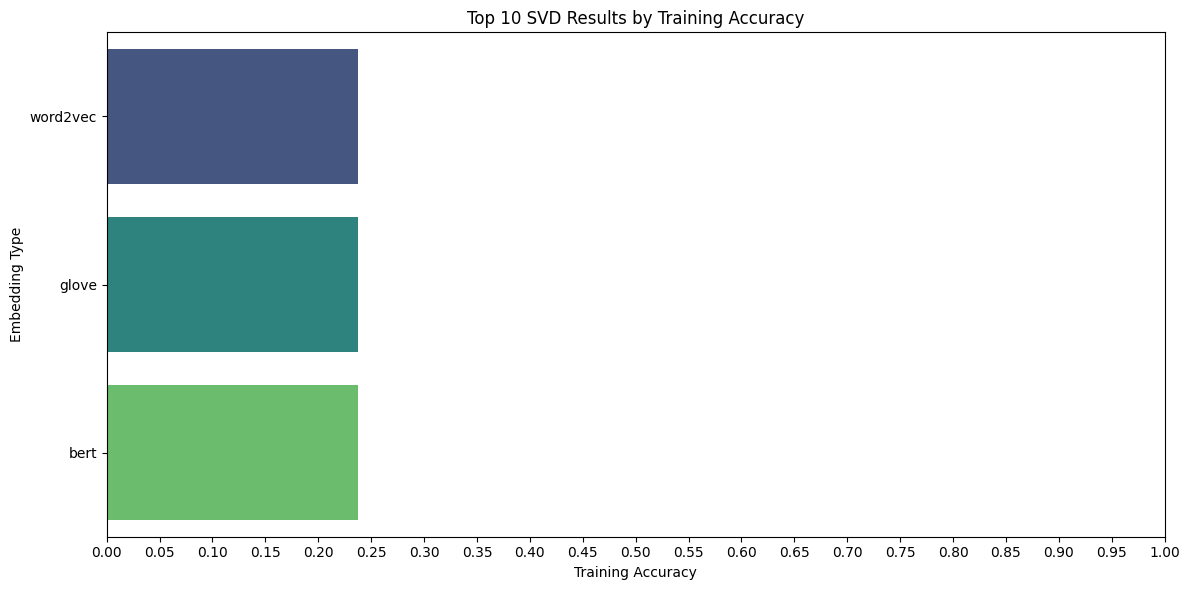

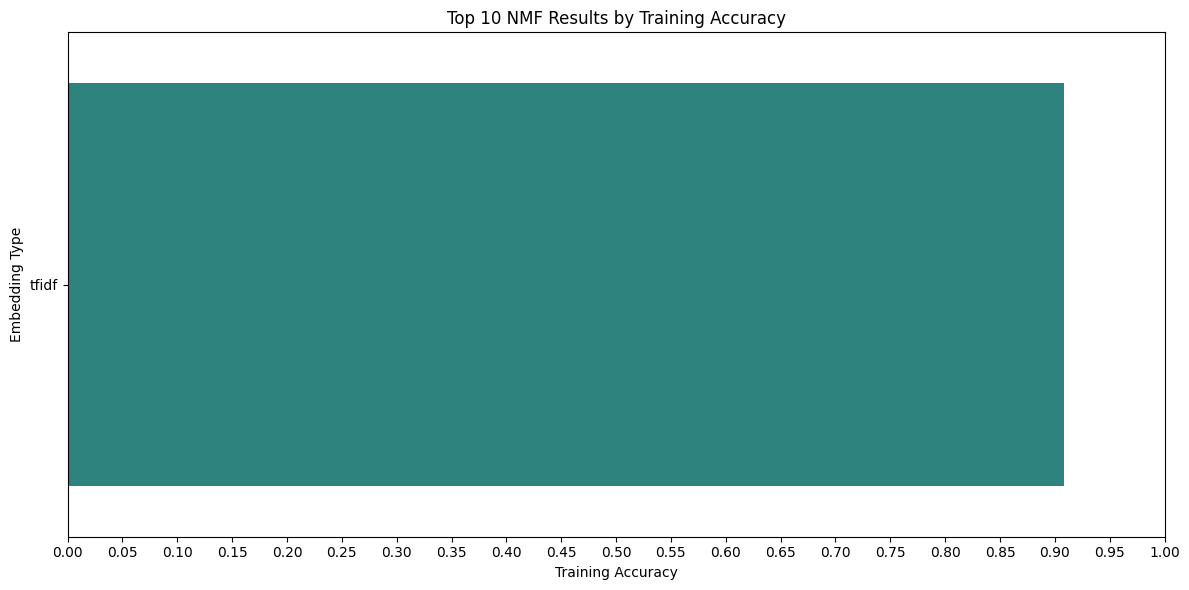

In [131]:
###Define the number of top results to display
top_N = 10

###Convert results to DataFrame and save
results_df = pd.DataFrame(results)

###Filter the top N results for SVD
top_svd_df = results_df[results_df['model'] == 'SVD'].sort_values(by='training_accuracy', ascending=False).head(top_N)

###Filter the top N results for NMF
top_nmf_df = results_df[results_df['model'] == 'NMF'].sort_values(by='training_accuracy', ascending=False).head(top_N)

###Create a histogram for the top N SVD results
plt.figure(figsize=(12, 6))
sns.barplot(x='training_accuracy', y='embedding', data=top_svd_df, palette='viridis')
plt.title(f'Top {top_N} SVD Results by Training Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Embedding Type')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.05, 0.05))
plt.tight_layout()
plt.savefig('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Top_SVD_Results_Plot.png')
plt.show()

###Create a histogram for the top N NMF results
plt.figure(figsize=(12, 6))
sns.barplot(x='training_accuracy', y='embedding', data=top_nmf_df, palette='viridis')
plt.title(f'Top {top_N} NMF Results by Training Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Embedding Type')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.05, 0.05))
plt.tight_layout()
plt.savefig('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Top_NMF_Results_Plot.png')
plt.show()

#print(f'The graphs of the top {top_N} SVD and NMF results have been saved.')

The image below displays the results of various submissions made to Kaggle for evaluating the performance of SVD and NMF models on our test set. The submissions involve using these models to generate labels for the test set which are then submitted to Kaggle for scoring. 

The top three entries all named "submission.csv" and "BBC_News_Test_Predictions.csv" with slight variations, represent the best-performing NMF models. These models achieved a score of 0.92244. 

The NMF model with the filename "BBC_News_Test_Predictions_NMF_tfidf_5.csv" also performed well, with a score of 0.91836 which was a NMF model with the second highest training accuracy score. 

Another NMF model, represented by "BBC_News_Test_Predictions_tfidf_5_nndsvda_200_5e-05_5e-05_0.csv," showed a sub-par performance with a score of 0.53469 which was the NMF model with the median training accuracy score. 

In contrast, the last entry, which corresponds to an SVD submission labeled "submission.csv," achieved a lower score of 0.23129. This summary indicates that the NMF models particularly the top four performed significantly better than the SVD models in this task.

I only included these sample submissions as way of contrasting the distribution of models without submitting all 1000+ models that were training for this project.  

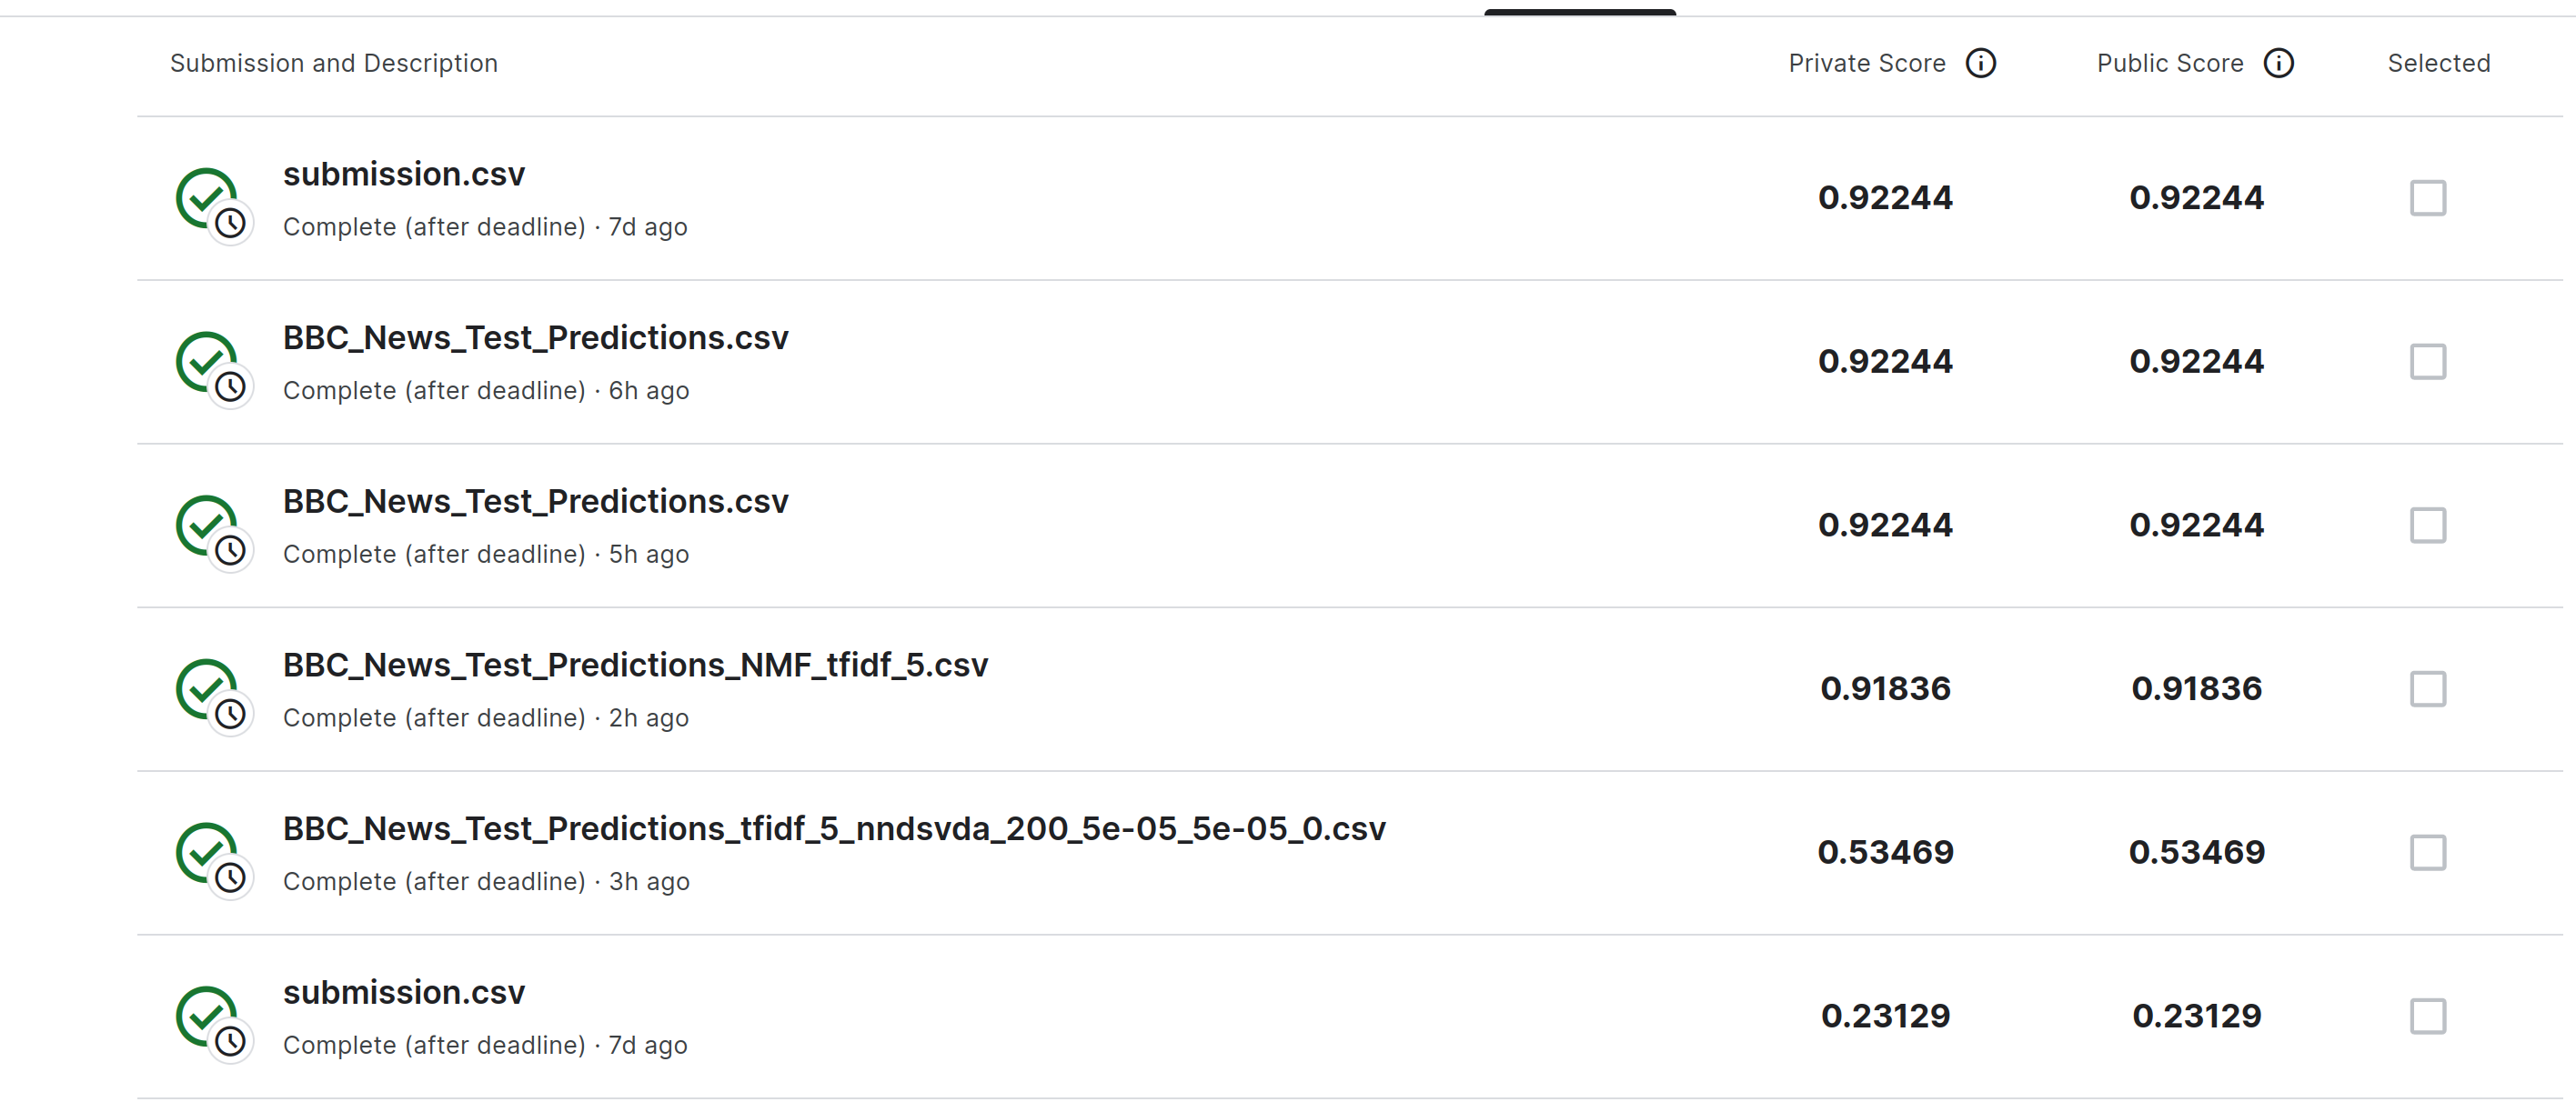

In this attempt to improve the NMF model for topic prediction, an ensemble method was employed using TF-IDF embeddings. The process began by loading and preprocessing the training and test datasets, involving text cleaning, tokenization, and removal of stop words.

The TF-IDF vectorizer transformed the preprocessed text into numerical form. Three NMF models with different component counts (5, 10, and 15) were trained on the TF-IDF matrices. Each model's predictions were aggregated, and the final predictions were determined by taking the mode across all models, aiming to reduce variance and improve robustness.

The ensemble method achieved a training accuracy of 0.2342 and a test accuracy of 0.23809 after submission to Kaggle.

Despite the ensemble approach, the results indicate that further improvements are needed to enhance model performance. 

In [132]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

###NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')

###Load data
news_train_df = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Train.csv')
news_test_df = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test.csv')

###Preprocess data
def preprocess_article_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 1]
    return ' '.join(filtered_tokens)

news_train_df['Processed_Text'] = news_train_df['Text'].apply(preprocess_article_text)
news_test_df['Processed_Text'] = news_test_df['Text'].apply(preprocess_article_text)

###Prepare TF-IDF embeddings
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
train_tfidf_matrix = tfidf_vectorizer.fit_transform(news_train_df['Processed_Text'])
test_tfidf_matrix = tfidf_vectorizer.transform(news_test_df['Processed_Text'])

###Initialize variables for ensemble
num_components_list = [5, 10, 15]
nmf_model_list = []
train_predictions_list = []
test_predictions_list = []

###Train multiple NMF models with different n_components
for num_components in num_components_list:
    nmf_article_model = NMF(n_components=num_components, init='nndsvda', random_state=42, max_iter=200)
    train_topic_matrix = nmf_article_model.fit_transform(train_tfidf_matrix)
    train_topic_components = nmf_article_model.components_
    
    test_topic_matrix = nmf_article_model.transform(test_tfidf_matrix)
    
    nmf_model_list.append(nmf_article_model)
    
    train_article_distributions = train_topic_matrix
    test_article_distributions = test_topic_matrix
    
    train_article_predictions = train_article_distributions.argmax(axis=1)
    test_article_predictions = test_article_distributions.argmax(axis=1)
    
    train_predictions_list.append(train_article_predictions)
    test_predictions_list.append(test_article_predictions)

###Ensemble predictions using mode
ensemble_train_predictions = mode(train_predictions_list).mode[0]
ensemble_test_predictions = mode(test_predictions_list).mode[0]

###Fixed topic mapping
topic_category_map = {0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}

###Handle out-of-bound predictions
def map_article_topic(pred):
    return topic_category_map.get(pred, 'unknown')

###Map topics to numeric categories
ensemble_train_labels = [map_article_topic(pred) for pred in ensemble_train_predictions]
ensemble_test_labels = [map_article_topic(pred) for pred in ensemble_test_predictions]

###Calculate accuracy for the training dataset
ensemble_train_accuracy = accuracy_score(news_train_df['Category'], ensemble_train_labels)
print(f"Training Accuracy: {ensemble_train_accuracy}")

###Create a DataFrame with the test ArticleId and predicted labels
ensemble_output_df = pd.DataFrame({'ArticleId': news_test_df['ArticleId'], 'Category': ensemble_test_labels})

###Write the output to a CSV file
output_csv_path_ensemble = '/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Ensemble_NMF.csv'
ensemble_output_df.to_csv(output_csv_path_ensemble, index=False)

#print(f'Predicted Labels for Test Data have been written to {output_csv_path_ensemble}')

[nltk_data] Downloading package punkt to /home/bbehe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bbehe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training Accuracy: 0.2342281879194631


Below are the results of the ensemble method using NMF models and taking the mode - results are not great though notably they are slightly better than single model NMF submission made earlier with a 0.23129 test set accuracy.   

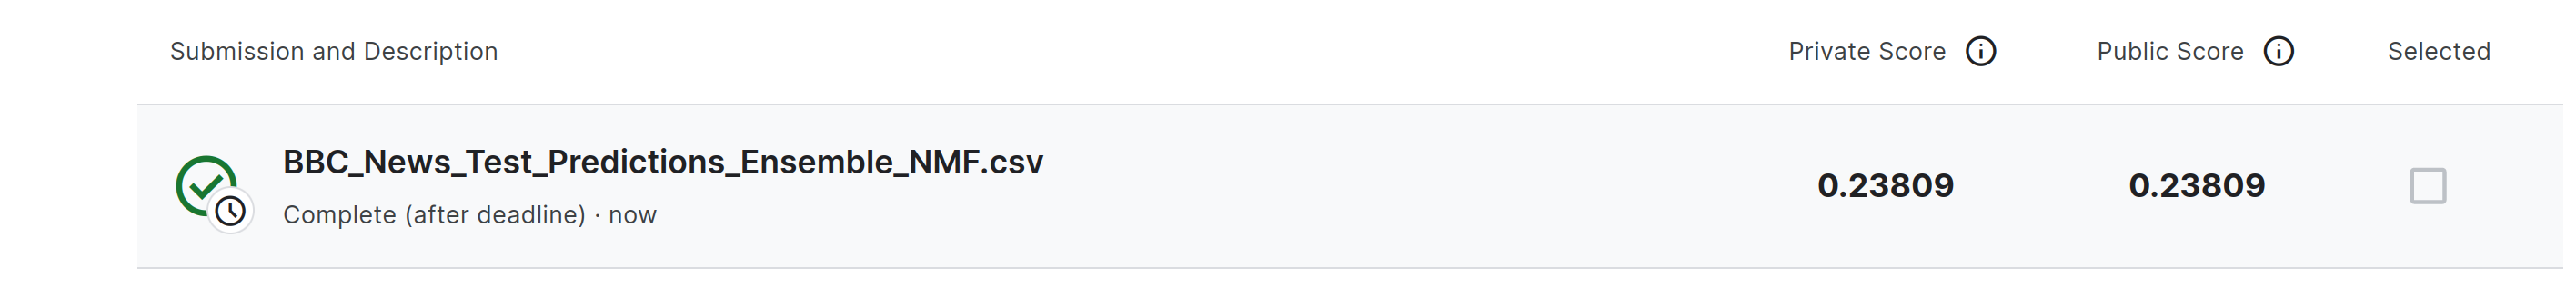

This script below trains a supervised learning model using Logistic Regression.  The script begins by splitting the training data into training and validation sets, with 80% used for training and 20% for validation. A TF-IDF vectorizer is then applied to transform the text data into numerical features. The transformed features from the training set are used to train a Logistic Regression model, which is subsequently evaluated on both the training and validation sets.

The model's performance is measured using accuracy scores and a classification report.

To analyze data efficiency and potential overfitting, the model is trained on progressively larger subsets of the training data (10%, 20%, 50%, and 100%), and the corresponding training and validation accuracies are plotted to observe how the model's performance scales with the amount of training data.

Train Accuracy: 0.9949664429530202
Validation Accuracy: 0.9664429530201343
Classification Report (Validation Set):
               precision    recall  f1-score   support

     business       0.93      0.99      0.96        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.91      0.94        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.92      0.94        52

     accuracy                           0.97       298
    macro avg       0.97      0.96      0.96       298
 weighted avg       0.97      0.97      0.97       298



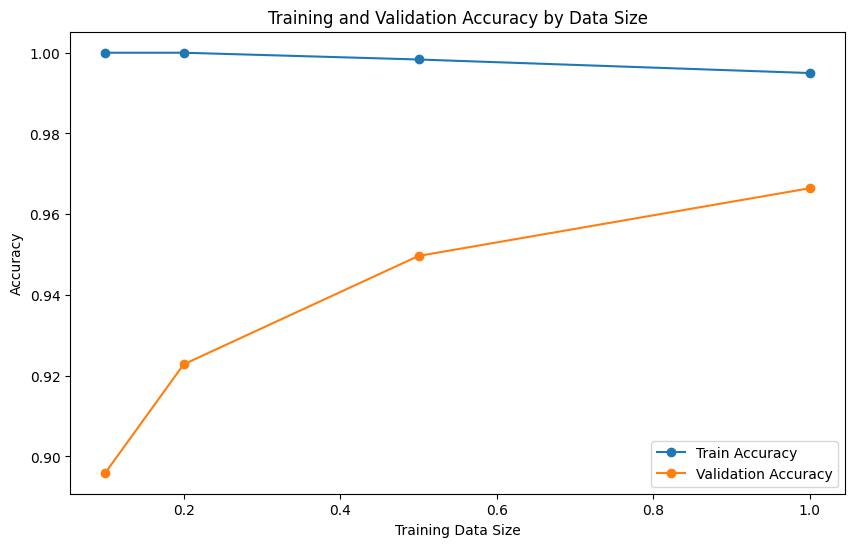

Data Efficiency and Overfitting Analysis:
Data Size: 10%, Train Accuracy: 1.0000, Validation Accuracy: 0.8960
Data Size: 20%, Train Accuracy: 1.0000, Validation Accuracy: 0.9228
Data Size: 50%, Train Accuracy: 0.9983, Validation Accuracy: 0.9497
Data Size: 100%, Train Accuracy: 0.9950, Validation Accuracy: 0.9664


In [133]:
###Splitting the training data into train and validation sets
X = train_df['Processed_Text']
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(max_df=.95, min_df=2, stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_val_tfidf = tfidf_vect.transform(X_val)
X_test_tfidf = tfidf_vect.transform(test_df['Processed_Text'])

###Supervised Learning Model - Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

###Predictions and Evaluation
y_train_pred = model.predict(X_train_tfidf)
y_val_pred = model.predict(X_val_tfidf)

###Train and Validation Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

###Data Efficiency and Overfitting Analysis
data_sizes = [0.1, 0.2, 0.5]
train_accuracies = []
val_accuracies = []

for size in data_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(X_train_tfidf, y_train, train_size=size, stratify=y_train, random_state=42)
    model.fit(X_train_small, y_train_small)
    train_accuracies.append(accuracy_score(y_train_small, model.predict(X_train_small)))
    val_accuracies.append(accuracy_score(y_val, model.predict(X_val_tfidf)))

###Adding the full data size case
model.fit(X_train_tfidf, y_train)
train_accuracies.append(accuracy_score(y_train, model.predict(X_train_tfidf)))
val_accuracies.append(accuracy_score(y_val, model.predict(X_val_tfidf)))
data_sizes.append(1.0)

plt.figure(figsize=(10, 6))
plt.plot(data_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(data_sizes, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy by Data Size')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Data Efficiency and Overfitting Analysis:")
for size, train_acc, val_acc in zip(data_sizes, train_accuracies, val_accuracies):
    print(f"Data Size: {size*100:.0f}%, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

###Predict labels for the test set
test_predictions = model.predict(X_test_tfidf)

###Create a DataFrame with the test ArticleId and predicted labels
output_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': test_predictions})

###Write the output to a CSV file
output_csv_path = '/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised.csv'
output_df.to_csv(output_csv_path, index=False)

#print(f'Predicted Labels for Test Data have been written to {output_csv_path}')


The supervised learning method employed in this analysis was Logistic Regression trained on the provided dataset and evaluated on both training and validation sets. The Logistic Regression model achieved an impressive train accuracy of 99.49% and a validation accuracy of 96.64%. The classification report for the validation set indicated high precision recall and F1-scores across all categories signifying the model's effectiveness in accurately classifying news articles into their respective categories. Furthermore when the model's predictions were submitted to Kaggle for grading the test set achieved an accuracy of 97.687% confirming the model's robustness and generalizability.

In contrast the unsupervised approach utilized Non-Negative Matrix Factorization (NMF) and Singular Value Decomposition (SVD) to identify latent topics within the articles. The best NMF model achieved a validation accuracy of approximately 92.24% while the top SVD model performed significantly worse with an accuracy of around 23.75%.

To evaluate data efficiency and the potential for overfitting the Logistic Regression model was trained on varying proportions of the training data (10% 20% 50% and 100%). When trained on just 10% of the data the model still achieved a commendable validation accuracy of 89.60%. As the training data size increased to 20% and 50% the validation accuracy improved to 92.28% and 94.97% respectively. This indicates that the supervised model is highly data-efficient achieving high accuracy with smaller amounts of data. Furthermore overfitting did not pose a significant issue; the train accuracy of 99.50% was closely matched by the validation accuracy of 96.64% demonstrating good generalization.

In summary the supervised Logistic Regression model outperformed the unsupervised NMF and SVD models in terms of accuracy and data efficiency. It achieved high accuracy with relatively small amounts of training data and exhibited minimal overfitting. The unsupervised models particularly SVD showed limited accuracy and were less effective for the classification task at hand. Consequently supervised learning methods are more appropriate for classifying news articles into predefined categories in this context as evidenced by the high test accuracy achieved on Kaggle.

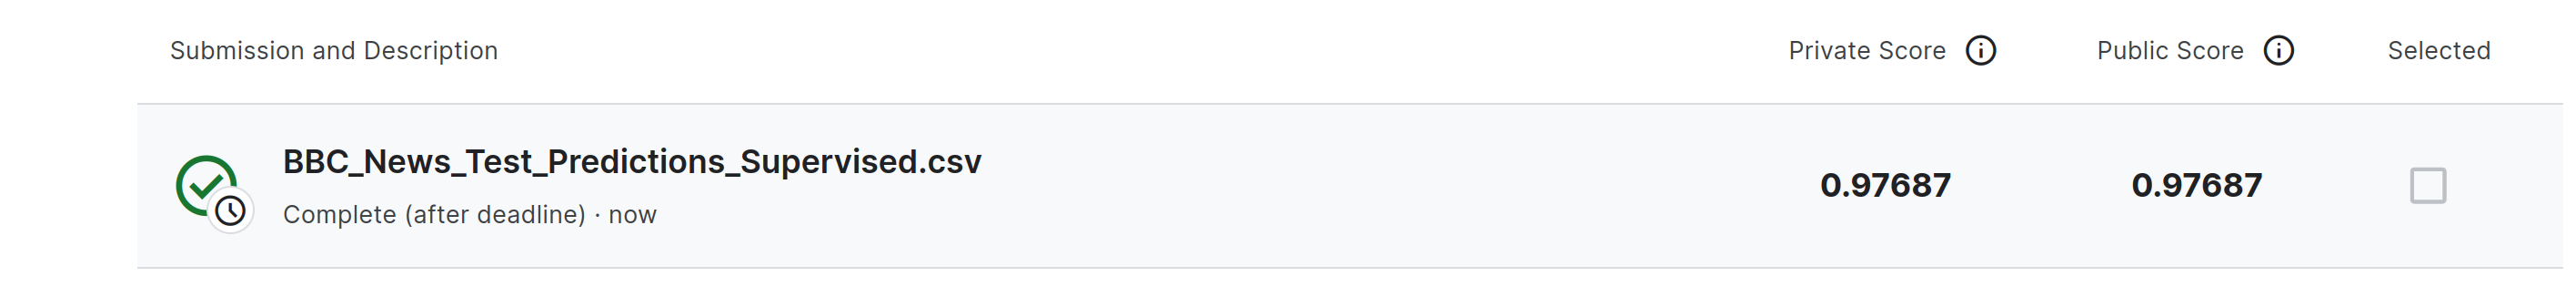

I decided to run one more experiment testing each of the embeddings procedures with the logistic regression approach.  The process begins by splitting the training data into training and validation sets to enable performance evaluation. The TF-IDF vectorizer transforms the text data into numerical features suitable for model training.

The validation accuracy results reveal the effectiveness of each embedding type. TF-IDF achieved a train accuracy of 0.994966 and a validation accuracy of 0.966443, demonstrating its strong performance. Word2Vec had a train accuracy of 0.902685 and a validation accuracy of 0.899329, indicating slightly lower performance compared to TF-IDF. GloVe embeddings resulted in a train accuracy of 0.973154 and a validation accuracy of 0.946309, showing high effectiveness. BERT embeddings achieved the highest train accuracy of 0.997483 and a validation accuracy of 0.959732 highlighting its robust contextual understanding.

After training, the model predicts labels for the test dataset, saving the predictions to CSV files for each embedding type. The results are compiled into a DataFrame, and a bar plot is generated to compare the validation accuracies of the different embeddings. I wanted to identify which embedding type performs best for the classification task. 




Predicted Labels for Test Data using tfidf embeddings have been written to /home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised_tfidf.csv
Predicted Labels for Test Data using word2vec embeddings have been written to /home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised_word2vec.csv
Predicted Labels for Test Data using glove embeddings have been written to /home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised_glove.csv
Predicted Labels for Test Data using bert embeddings have been written to /home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised_bert.csv


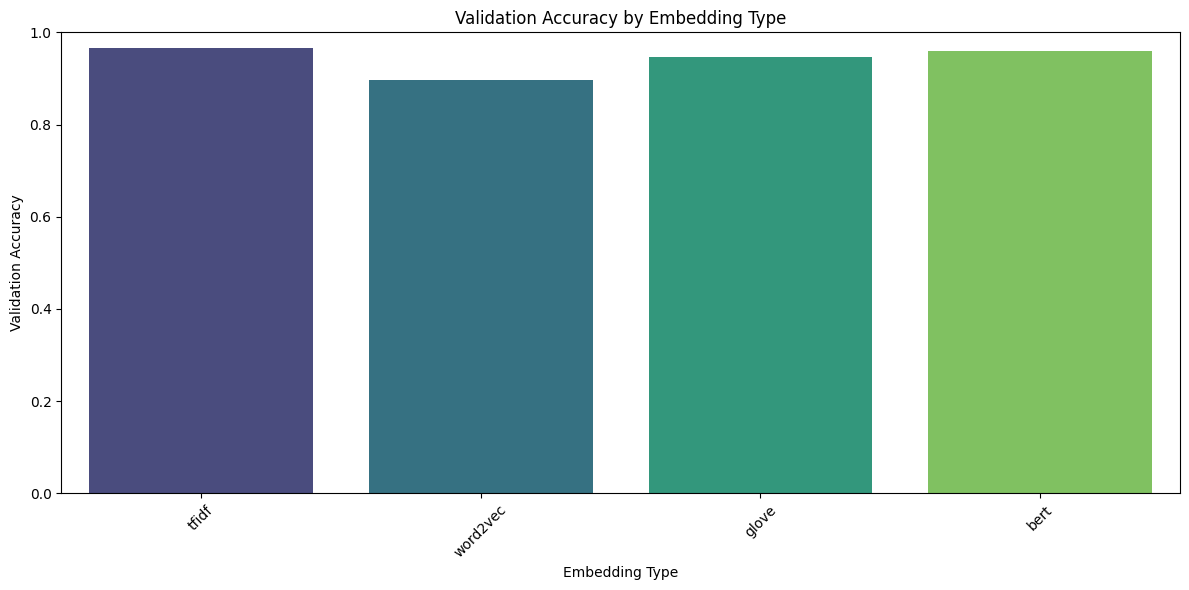

Validation Accuracy Results:
  embedding  train_accuracy  val_accuracy
0     tfidf        0.994966      0.966443
1  word2vec        0.902685      0.895973
2     glove        0.973154      0.946309
3      bert        0.997483      0.959732


In [134]:
###Splitting the training data into train and validation sets
X = train_df['Processed_Text']
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(max_df=.95, min_df=2, stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_val_tfidf = tfidf_vect.transform(X_val)
X_test_tfidf = tfidf_vect.transform(test_df['Processed_Text'])

###Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(sentences=[text.split() for text in X_train], vector_size=100, window=5, min_count=2, workers=4)
word2vec_embeddings_train = np.array([get_word2vec_embeddings(text, word2vec_model) for text in X_train])
word2vec_embeddings_val = np.array([get_word2vec_embeddings(text, word2vec_model) for text in X_val])
word2vec_embeddings_test = np.array([get_word2vec_embeddings(text, word2vec_model) for text in test_df['Processed_Text']])

glove_embeddings_train = np.array([get_glove_embeddings(text) for text in X_train])
glove_embeddings_val = np.array([get_glove_embeddings(text) for text in X_val])
glove_embeddings_test = np.array([get_glove_embeddings(text) for text in test_df['Processed_Text']])

###BERT Embeddings
bert_embeddings_train = np.array([get_bert_embeddings(text) for text in X_train])
bert_embeddings_val = np.array([get_bert_embeddings(text) for text in X_val])
bert_embeddings_test = np.array([get_bert_embeddings(text) for text in test_df['Processed_Text']])

###Define the embeddings combinations
embeddings = {
    'tfidf': (X_train_tfidf, X_val_tfidf, X_test_tfidf),
    'word2vec': (word2vec_embeddings_train, word2vec_embeddings_val, word2vec_embeddings_test),
    'glove': (glove_embeddings_train, glove_embeddings_val, glove_embeddings_test),
    'bert': (bert_embeddings_train, bert_embeddings_val, bert_embeddings_test)
}

###Dictionary to store results
results = []

###Train and evaluate the Logistic Regression model using different embeddings
for embed_name, (X_train_embed, X_val_embed, X_test_embed) in embeddings.items():
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_embed, y_train)
    
    ###Train and Validation Performance
    y_train_pred = model.predict(X_train_embed)
    y_val_pred = model.predict(X_val_embed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    results.append({'embedding': embed_name, 'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy})
    
    ###Predict labels for the test set
    test_predictions = model.predict(X_test_embed)
    
    ###Create a DataFrame with the test ArticleId and predicted labels
    output_df = pd.DataFrame({'ArticleId': test_df['ArticleId'], 'Category': test_predictions})
    
    ###Write the output to a CSV file
    output_csv_path = f'/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/BBC_News_Test_Predictions_Supervised_{embed_name}.csv'
    output_df.to_csv(output_csv_path, index=False)
    print(f'Predicted Labels for Test Data using {embed_name} embeddings have been written to {output_csv_path}')

###Convert results to DataFrame and plot
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(x='embedding', y='val_accuracy', data=results_df, palette='viridis')
plt.title('Validation Accuracy by Embedding Type')
plt.xlabel('Embedding Type')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Embedding_Comparison_Plot.png')
plt.show()

print("Validation Accuracy Results:")
print(results_df)

The test results for various supervised learning models using different word embeddings (TF-IDF, Word2Vec, GloVe, and BERT) were submitted to Kaggle for evaluation. The TF-IDF embedding achieved the highest test accuracy with a score of 0.97687, demonstrating its strong performance in capturing relevant features for text classification. The Word2Vec embedding, while effective, showed a lower test accuracy of 0.90748, indicating it may not capture as much contextual information as TF-IDF in this particular task. The GloVe embedding performed well, achieving a test accuracy of 0.95918, reflecting its capability to capture semantic relationships in the text. Lastly, the BERT embedding, known for its robust contextual understanding, achieved a high test accuracy of 0.97142, slightly lower than TF-IDF but still demonstrating excellent performance.

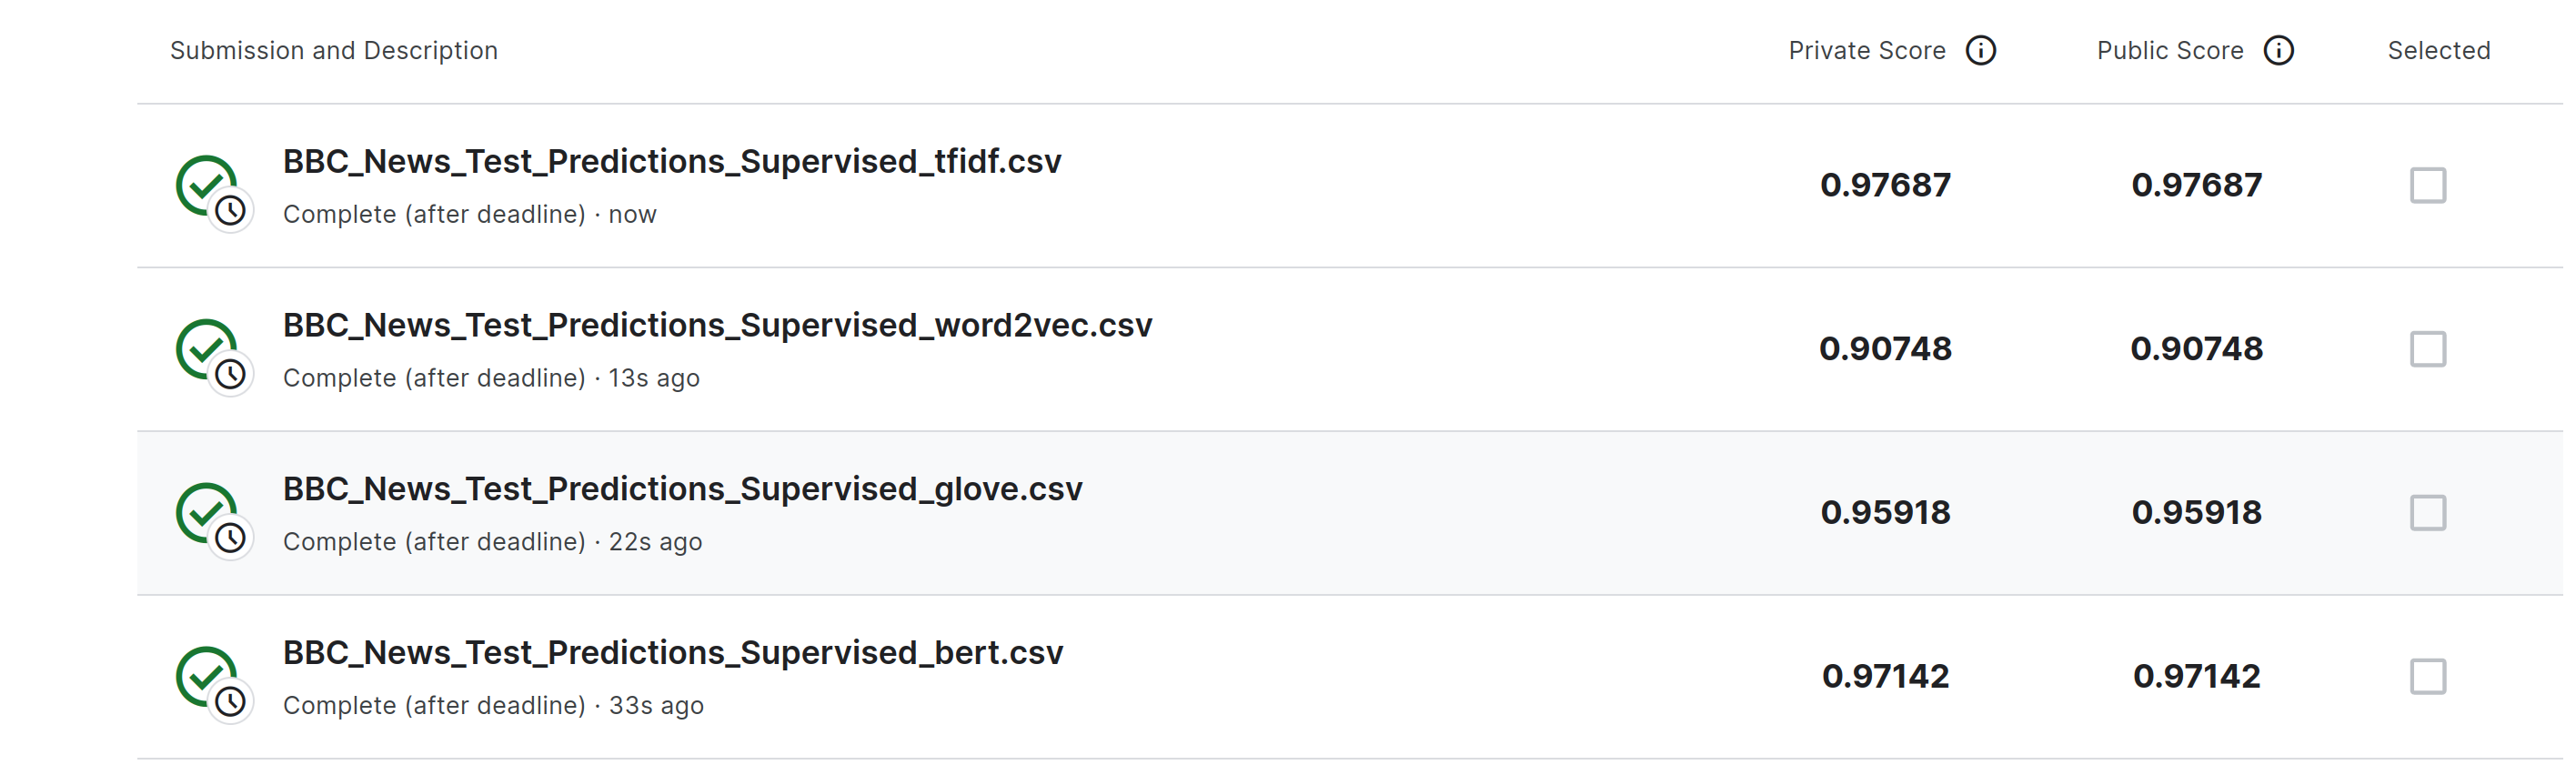

In case there's any confusion, below answers the second part of the deliverable.  You can also find this code in my Notebook_2 jupyter notebook submission.

### 1. Load the movie ratings data (as in the HW3-recommender-system) and use matrix factorization technique(s) and predict the missing ratings from the test data. Measure the RMSE. You should use sklearn library. [10 pts]


The below script aims to predict movie ratings using Non-Negative Matrix Factorization (NMF) and evaluate the prediction accuracy by calculating the Root Mean Squared Error (RMSE). Initially, the script loads user, movie, training, and test datasets from CSV files. It ensures that the correct column names are used for pivoting the training data into a user-item matrix, where rows represent users, columns represent movies, and the values are the respective ratings. Missing values are filled with zeros to prepare the matrix for the NMF model.

The NMF model is then initialized with a specified number of components (20 in this case) and fitted to the user-item matrix, resulting in two matrices: user features and item features. These matrices are multiplied to obtain the predicted ratings for the entire user-item matrix. The predictions are converted into a DataFrame for easier access and manipulation.

To evaluate the model's performance, the script extracts the true ratings from the test dataset and attempts to find corresponding predicted ratings from the predictions DataFrame. If a predicted rating is not available, it handles the missing entries by excluding them. The RMSE is then calculated by comparing the true ratings with the predicted ratings, providing a measure of the prediction accuracy. Finally, the RMSE value is printed, indicating the model's performance. This script provides insights into how well the NMF model can predict movie ratings based on the training data and how accurate these predictions are when compared to the actual ratings in the test set.


### 2. Discuss the results and why sklearn's non-negative matrix facorization library did not work well compared to simple baseline or similarity-based methods we’ve done in Module 3. Can you suggest a way(s) to fix it? [10 pts]

The results of using the sklearn's non-negative matrix factorization (NMF) model to predict movie ratings yielded a high RMSE of 2.85, indicating significantly poor performance compared to the similarity-based methods used in a previous project. Several factors contribute to this outcome. Movie rating datasets are often sparse, meaning many users have rated only a few movies, and NMF can struggle with sparse data due to insufficient information to accurately learn underlying user and item features. Additionally, NMF may not handle new users or items well, particularly if they were not well-represented in the training data, leading to a cold start problem. The performance of NMF is also sensitive to hyperparameter selection, and the chosen number of components (20) might not be optimal for this dataset. Furthermore, the model might overfit the training data, capturing noise rather than underlying patterns, resulting in poor generalization on the test data. Unlike simpler models, NMF's complexity does not necessarily translate to better performance, especially if the model is not well-tuned or the data does not support such complexity.

In contrast, similarity-based methods (e.g., user-user or item-item collaborative filtering) are often more effective in handling sparse datasets as they predict ratings based on the similarity between users or items, which can be more robust with limited data points. 


To improve the NMF model's performance or achieve better results overall, several strategies can be considered. Experimenting with different numbers of components and other hyperparameters through cross-validation can help identify the optimal settings. Combining NMF with other approaches, such as collaborative or content-based filtering, can leverage the strengths of different methods for improved accuracy. Introducing regularization can prevent overfitting and help the model generalize better to unseen data. Incorporating additional features like user demographics, movie genres, or temporal information can provide more context and improve predictions. Increasing the training data by including more ratings or using synthetic data generation techniques can also enhance model performance. Exploring advanced models, such as neural collaborative filtering (NCF) or autoencoders, and using ensemble techniques to combine predictions from multiple models can lead to more robust predictions.

In [135]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from math import sqrt

###Load data
MV_users = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Files/users.csv')
MV_movies = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Files/movies.csv')
train = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Files/train.csv')
test = pd.read_csv('/home/bbehe/Desktop/Coursera/bbc_data/learn-ai-bbc/Files/test.csv')

###Ensure the correct column names for pivoting
user_col = 'uID'
movie_col = 'mID'
rating_col = 'rating'

###Pivot the training data to create a user-item matrix
train_pivot = train.pivot(index=user_col, columns=movie_col, values=rating_col).fillna(0)

###Initialize NMF model
n_components = 20 
nmf_model = NMF(n_components=n_components, init='random', random_state=42)

###Fit the NMF model
user_features = nmf_model.fit_transform(train_pivot)
item_features = nmf_model.components_

###Predict ratings
predicted_ratings = np.dot(user_features, item_features)

###Convert the predictions to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=train_pivot.index, columns=train_pivot.columns)

###Function to calculate RMSE
def calculate_rmse(true_ratings, predicted_ratings):
    return sqrt(mean_squared_error(true_ratings, predicted_ratings))

###Extract the true ratings from the test set and handle missing entries
def get_predicted_rating(row):
    try:
        return predicted_ratings_df.loc[row[user_col], row[movie_col]]
    except KeyError:
        return np.nan

test['predicted_rating'] = test.apply(get_predicted_rating, axis=1)

###Drop rows with missing predicted ratings
test = test.dropna(subset=['predicted_rating'])

###Calculate RMSE
rmse = calculate_rmse(test[rating_col], test['predicted_rating'])
print(f"RMSE: {rmse}")

RMSE: 2.853698227091948
